In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error

%matplotlib inline

In [2]:
red_wine = pd.read_csv('winequality-red.csv')
white_wine = pd.read_csv('winequality-white.csv')

In [3]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
len(red_wine)

1599

In [4]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [8]:
len(white_wine)

4898

In [54]:
wine = pd.concat([red_wine, white_wine])
wine.set_index(np.array(range(len(wine))), inplace = True)

In [325]:
wine.min()

fixed acidity           3.80000
volatile acidity        0.08000
citric acid             0.00000
residual sugar          0.60000
chlorides               0.00900
free sulfur dioxide     1.00000
total sulfur dioxide    6.00000
density                 0.98711
pH                      2.72000
sulphates               0.22000
alcohol                 8.00000
quality                 3.00000
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024D5168A9B0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000024D51BCFDD8>]], dtype=object)

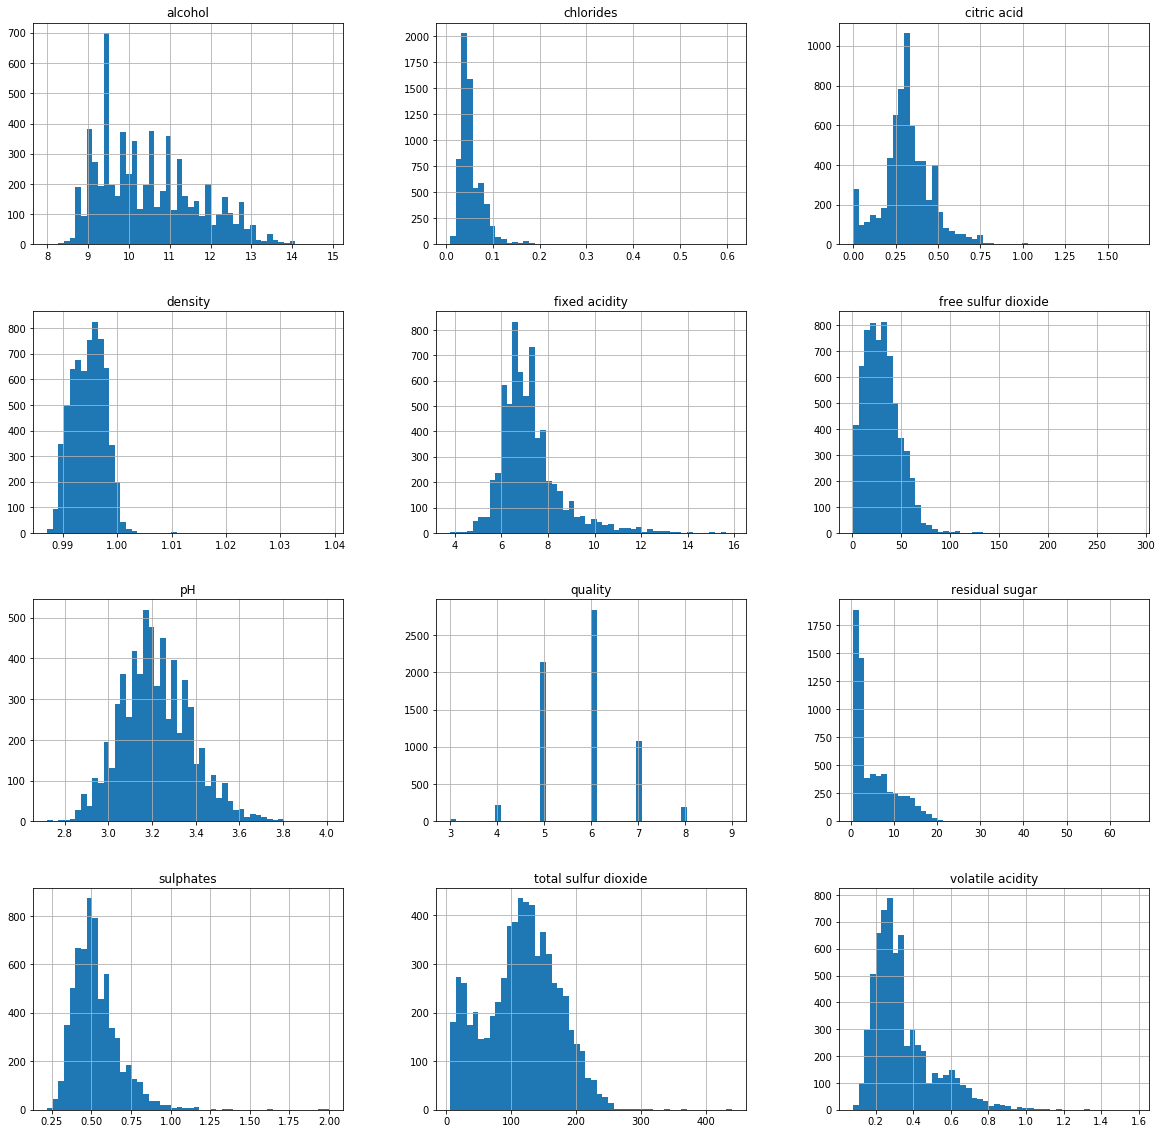

In [9]:
wine.hist(figsize=(20,20), bins=50)

In [373]:
skew0 = wine.skew()
skew0

fixed acidity           1.723290
volatile acidity        1.495097
citric acid             0.471731
residual sugar          1.435404
chlorides               5.399828
free sulfur dioxide     1.220066
total sulfur dioxide   -0.001177
density                 0.503602
pH                      0.386839
sulphates               1.797270
alcohol                 0.565718
quality                 0.189623
dtype: float64

In [182]:
model = PLSRegression(scale=False, n_components=11)
score = cross_val_score(model, wine.iloc[:,:-1], wine.iloc[:,-1], cv=20, scoring='neg_mean_absolute_error')
print(score.mean())

-0.571947915193


In [372]:
model = PLSRegression()
score = cross_val_score(model, wine.iloc[:,:-1], wine.iloc[:,-1], cv=20, scoring='neg_mean_absolute_error')
print(score.mean())

-0.5832237106980225


In [359]:
test_data = np.log1p(wine.iloc[:,:-1])
skew1 = test_data.skew()

In [380]:
abs(skew5) == abs(skew0)

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide     True
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                  True
dtype: bool

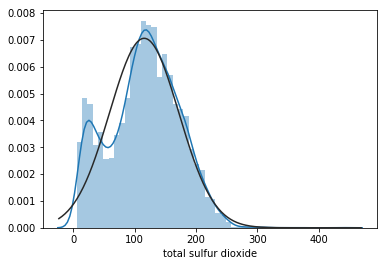

In [23]:
sns.distplot(wine['total sulfur dioxide'], fit=norm)

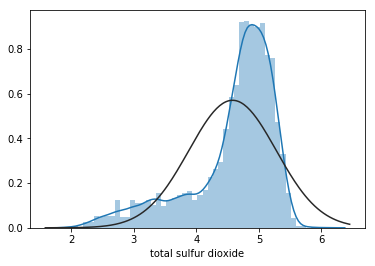

In [24]:
sns.distplot(test_data['total sulfur dioxide'], fit=norm)

In [188]:
model = PLSRegression(n_components=11)
score = cross_val_score(model, test_data, wine.iloc[:,-1], cv=20, scoring='neg_mean_absolute_error')
print(score.mean())

-0.568378635584


In [360]:
test_data['total sulfur dioxide'] = wine['total sulfur dioxide']
test_data['quality'] = wine['quality']

#model = PLSRegression()
score = cross_val_score(model, test_data, wine.iloc[:,-1], cv=20, scoring='neg_mean_absolute_error')
print(score.mean())

-0.03677586458803948


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024D5503E7B8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000024D55C1FCF8>]], dtype=object)

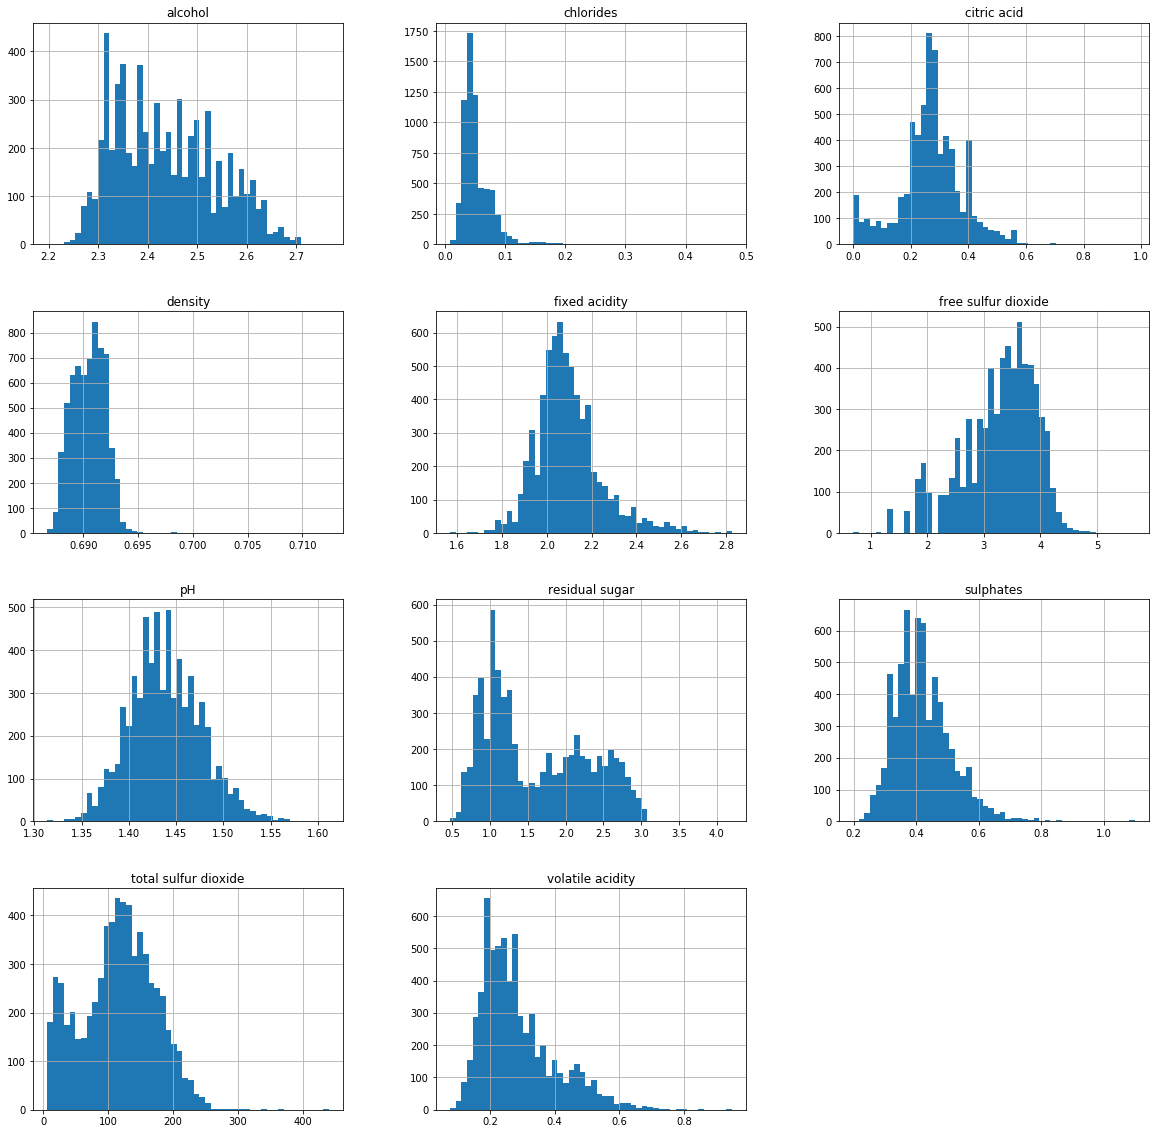

In [43]:
test_data.hist(figsize=(20,20), bins=50)

In [38]:
skew2 = test_data.skew()

In [365]:
#test_data = wine.iloc[:,:-1].copy()

for i in test_data:
    test_data[i] = StandardScaler().fit_transform(test_data[i].values.reshape(-1,1))

test_data['quality'] = wine['quality']

outliers =[]

for i in range(len(test_data)):
    for j in test_data.iloc[i,:-1]:
        if j > 8 or j < -8:
            outliers.append(i)

C:\Users\Vincent\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [350]:
outliers = pd.DataFrame(pd.Series(outliers).value_counts(), columns = ['count'])

In [366]:
outliers = pd.DataFrame(pd.Series(outliers).value_counts(), columns = ['count'])
outliers['count'].value_counts()

1    19
Name: count, dtype: int64

In [367]:
#for i in np.array(outliers.index):
 #   if outliers.loc[i].values < 4:
  #      outliers.drop(i, inplace=True)

log_data = test_data.copy()
log_data.drop(outliers.index, inplace = True)
score = cross_val_score(model, log_data.iloc[:,:-1], log_data.iloc[:,-1], cv=20, scoring='neg_mean_absolute_error')
print(score.mean())

-0.580405487532804


In [99]:
for i in np.array(outliers.index):
    if outliers.loc[i].values < 3:
        outliers.drop(i, inplace=True)

log_data = test_data.copy()
log_data.drop(outliers.index, inplace = True)
score = cross_val_score(model, log_data.iloc[:,:-1], log_data.iloc[:,-1], cv=20, scoring='neg_mean_absolute_error')
print(score.mean())

-0.580626623168


In [107]:
for i in np.array(outliers.index):
    if outliers.loc[i].values < 2:
        outliers.drop(i, inplace=True)

log_data = test_data.copy()
log_data.drop(outliers.index, inplace = True)
score = cross_val_score(model, log_data.iloc[:,:-1], log_data.iloc[:,-1], cv=20, scoring='neg_mean_absolute_error')
print(score.mean())

-0.580656537732


In [75]:
for i in np.array(outliers.index):
    if outliers.loc[i].values < 1:
        outliers.drop(i, inplace=True)

log_data = test_data.copy()
log_data.drop(outliers.index, inplace = True)
score = cross_val_score(model, log_data.iloc[:,:-1], log_data.iloc[:,-1], cv=20, scoring='neg_mean_absolute_error')
print(score.mean())

-0.5810367388714347


In [76]:
len(outliers) / len(wine)

0.0029244266584577496

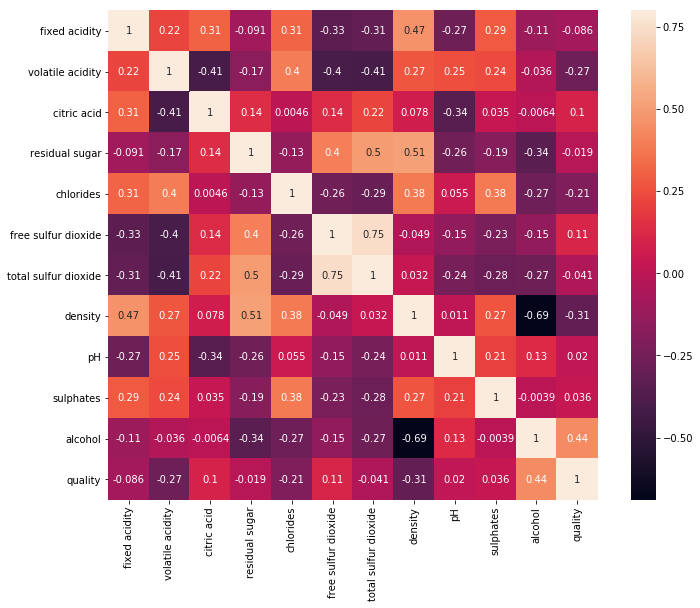

In [113]:
corrmat = log_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True,annot=True);

In [205]:
for i in log_data:
    if i == 'quality':
        pass
    else:
        test = log_data.drop(i, axis=1)
        model = PLSRegression(n_components=2)
        score = cross_val_score(model, test.iloc[:,:-1], test.iloc[:,-1], cv=20, scoring='neg_mean_absolute_error')
        print(i,score.mean())

fixed acidity -0.574592151374
volatile acidity -0.58408909161
citric acid -0.572714386186
residual sugar -0.586880845437
chlorides -0.574991308047
free sulfur dioxide -0.578982638821
total sulfur dioxide -0.579481855687
density -0.579079974799
pH -0.578162510462
sulphates -0.582063767269
alcohol -0.613844290171


In [125]:
copy = log_data.copy()
copy.insert(5, 'sulfur ratio', copy['free sulfur dioxide'] / copy['total sulfur dioxide'])
copy.drop(['free sulfur dioxide', 'total sulfur dioxide'], axis=1, inplace=True)
score = cross_val_score(model, copy.iloc[:,:-1], copy.iloc[:,-1], cv=20, scoring='neg_mean_absolute_error')
print(score.mean())

-0.579906118248


In [131]:
copy = log_data.copy()

copy.drop(['citric acid'], axis=1, inplace=True)
score = cross_val_score(model, copy.iloc[:,:-1], copy.iloc[:,-1], cv=20, scoring='neg_mean_absolute_error')
print(score.mean())

-0.572714386186


In [133]:
for i in copy:
    if i == 'quality':
        pass
    else:
        test = copy.drop(i, axis=1)
        score = cross_val_score(model, test.iloc[:,:-1], test.iloc[:,-1], cv=20, scoring='neg_mean_absolute_error')
        print(i,score.mean())

fixed acidity -0.572697169216
volatile acidity -0.584903771355
residual sugar -0.585005407691
chlorides -0.574315522947
free sulfur dioxide -0.575102856599
total sulfur dioxide -0.576620247457
density -0.576596031998
pH -0.574368865714
sulphates -0.579029433288
alcohol -0.611573808208


In [134]:

copy.insert(5, 'sulfur ratio', copy['free sulfur dioxide'] / copy['total sulfur dioxide'])
copy.drop(['free sulfur dioxide', 'total sulfur dioxide'], axis=1, inplace=True)
score = cross_val_score(model, copy.iloc[:,:-1], copy.iloc[:,-1], cv=20, scoring='neg_mean_absolute_error')
print(score.mean())

-0.576502913562


In [137]:
wine['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [136]:
quality3 = wine[wine['quality'] == 3]
quality4 = wine[wine['quality'] == 4]
quality5 = wine[wine['quality'] == 5]
quality6 = wine[wine['quality'] == 6]
quality7 = wine[wine['quality'] == 7]
quality8 = wine[wine['quality'] == 8]
quality9 = wine[wine['quality'] == 9]

In [159]:
resampled_wine = []

random_wine = np.random.choice(quality3.index, int(len(quality3.index)/2), replace = False)
resampled_wine.extend(random_wine)
random_wine = np.random.choice(quality4.index, int(len(quality4.index)/2), replace = False)
resampled_wine.extend(random_wine)
random_wine = np.random.choice(quality5.index, int(len(quality5.index)/2), replace = False)
resampled_wine.extend(random_wine)
random_wine = np.random.choice(quality6.index, int(len(quality6.index)/2), replace = False)
resampled_wine.extend(random_wine)
random_wine = np.random.choice(quality7.index, int(len(quality5.index)/2), replace = False)
resampled_wine.extend(random_wine)
random_wine = np.random.choice(quality8.index, int(len(quality4.index)/2), replace = False)
resampled_wine.extend(random_wine)
random_wine = np.random.choice(quality9.index, int(len(quality3.index)/2), replace = True)
resampled_wine.extend(random_wine)

data = wine.loc[resampled_wine]

In [160]:
data['quality'].value_counts()

6    1418
7    1069
5    1069
8     108
4     108
9      15
3      15
Name: quality, dtype: int64

In [161]:
score = cross_val_score(model, data.iloc[:,:-1], data.iloc[:,-1], cv=20, scoring='neg_mean_absolute_error')
print(score.mean())

-0.648543137733


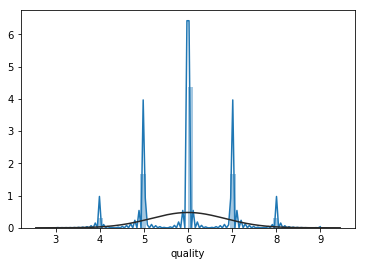

In [145]:
sns.distplot(data['quality'], fit=norm)

In [179]:
model = PLSRegression(n_components=11)
model.fit(data.iloc[:,:-1],data.iloc[:,-1])
mean_absolute_error(wine.iloc[:,-1], model.predict(wine.iloc[:,:-1]))

0.57911253028549647

In [206]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()

In [207]:
forest.fit(data.iloc[:,:-1],data.iloc[:,-1])
mean_absolute_error(wine.iloc[:,-1], forest.predict(wine.iloc[:,:-1]))

0.31289826073572413

In [208]:
from sklearn.ensemble import GradientBoostingRegressor
boost = GradientBoostingRegressor()

In [209]:
boost.fit(data.iloc[:,:-1],data.iloc[:,-1])
mean_absolute_error(wine.iloc[:,-1], boost.predict(wine.iloc[:,:-1]))

0.51302103478684613

In [210]:
score = cross_val_score(boost, copy.iloc[:,:-1], copy.iloc[:,-1], cv=20, scoring='neg_mean_absolute_error')
print(score.mean())

-0.562525519285


In [211]:
score = cross_val_score(forest, copy.iloc[:,:-1], copy.iloc[:,-1], cv=20, scoring='neg_mean_absolute_error')
print(score.mean())

-0.587044985204


In [212]:
from sklearn import linear_model
clf = linear_model.Lasso()
clf.fit(data.iloc[:,:-1],data.iloc[:,-1])
mean_absolute_error(wine.iloc[:,-1], clf.predict(wine.iloc[:,:-1]))

0.64654161086284323

In [313]:
model = PLSRegression(scale=False)
std_data = log_data.copy()
robust_data = log_data.copy()
minmax_data = log_data.copy()

for i in std_data:
    std_data[i] = StandardScaler().fit_transform(std_data[i].values.reshape(-1,1))

std_data['quality'] = wine['quality']

for i in std_data:
    robust_data[i] = RobustScaler().fit_transform(robust_data[i].values.reshape(-1,1))

robust_data['quality'] = wine['quality']

for i in std_data:
    minmax_data[i] = MinMaxScaler().fit_transform(minmax_data[i].values.reshape(-1,1))

minmax_data['quality'] = wine['quality']


C:\Users\Vincent\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Vincent\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [314]:
score = cross_val_score(model, std_data.iloc[:,:-1], std_data.iloc[:,-1], cv=20, scoring='neg_mean_absolute_error')
pred = cross_val_predict(model, std_data.iloc[:,:-1], std_data.iloc[:,-1], cv=20)
print(score.mean())

-0.5775710703682982


In [315]:
score = cross_val_score(model, robust_data.iloc[:,:-1], std_data.iloc[:,-1], cv=20, scoring='neg_mean_absolute_error')
print(score.mean())

-0.5886129856372782


In [316]:
score = cross_val_score(model, minmax_data.iloc[:,:-1], std_data.iloc[:,-1], cv=20, scoring='neg_mean_absolute_error')
print(score.mean())

-0.574952674362202


In [11]:
score = cross_val_score(model, wine.iloc[:,:-1], std_data.iloc[:,-1], cv=20, scoring='neg_mean_absolute_error')
print(score.mean())

-0.674964379926115


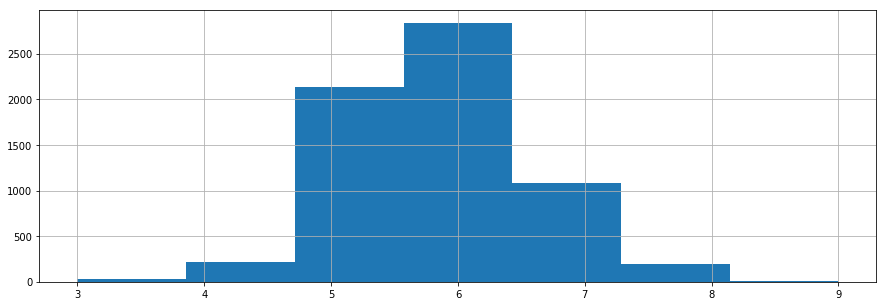

In [14]:
wine['quality'].hist(bins=7, figsize=(15,5))

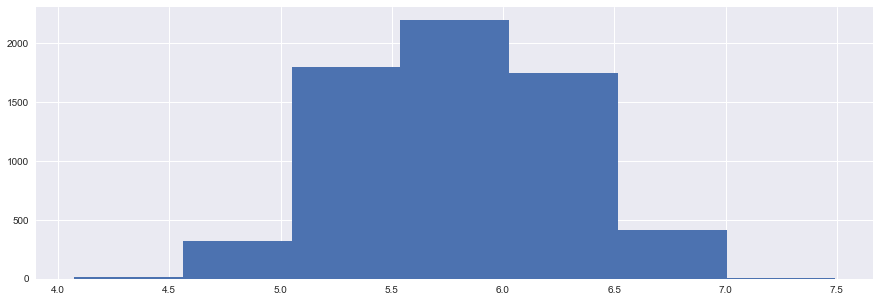

In [23]:
plt.style.use('seaborn')
plt.figure(figsize=(15,5))

plt.hist(pred, bins=7);

In [263]:
test = wine.copy()
from scipy import stats

for i in test:
    x,_ = stats.boxcox(test[i] - test[i].min() + 1)
    test[i] = x

test['quality'] = wine['quality']
#test.hist(bins=50, figsize=(15,15))

In [33]:
model = PLSRegression()
score = cross_val_score(model, test.iloc[:,:-1], std_data.iloc[:,-1], cv=20, scoring='neg_mean_absolute_error')
print(score.mean())

-0.580807945176932


In [36]:
np.cbrt(test['total sulfur dioxide'])


6497

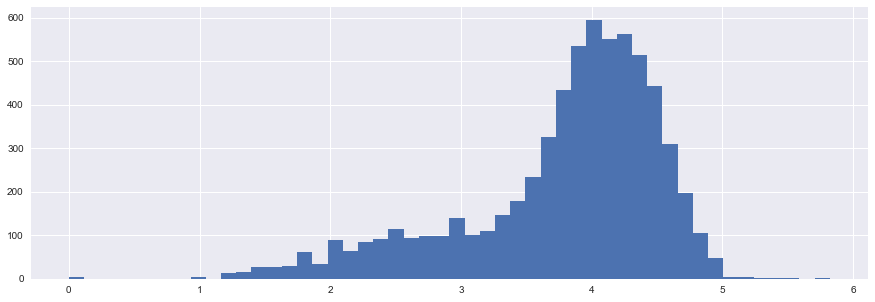

In [38]:
plt.style.use('seaborn')
plt.figure(figsize=(15,5))

plt.hist(np.cbrt(test['total sulfur dioxide']), bins=50);

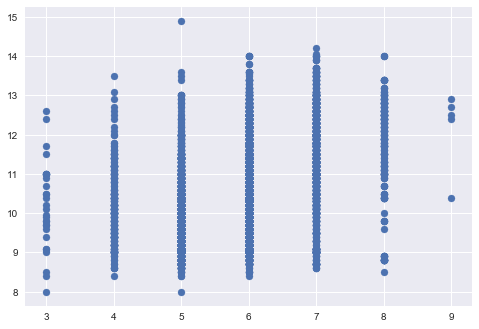

In [41]:
plt.scatter(y = wine['alcohol'], x = wine['quality'])

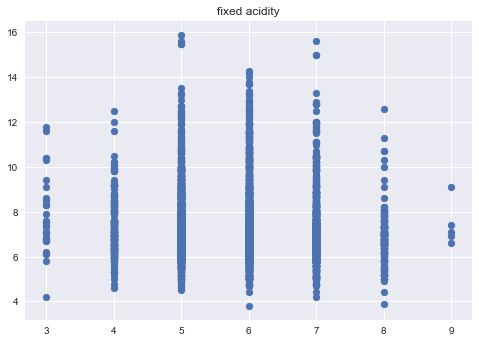

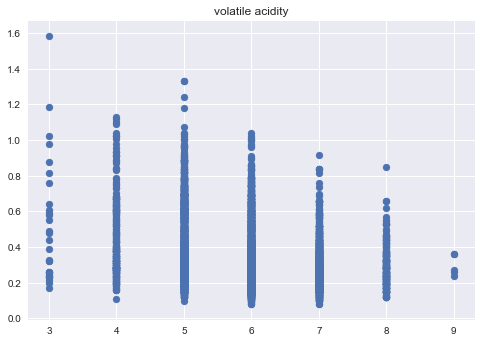

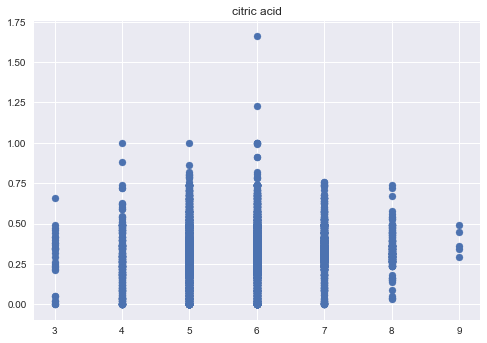

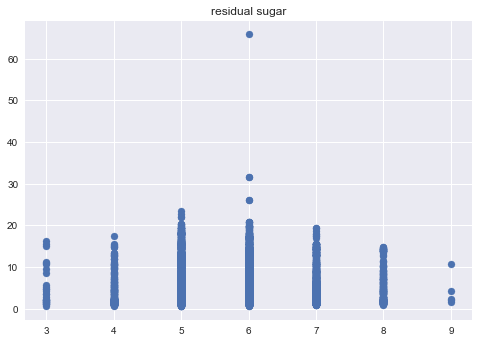

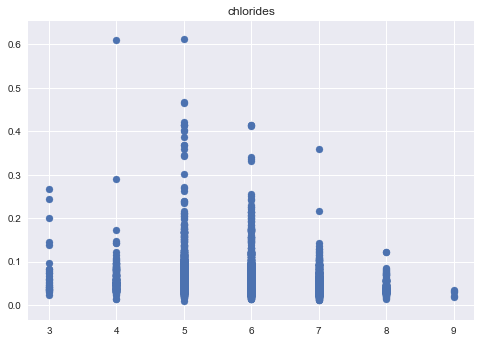

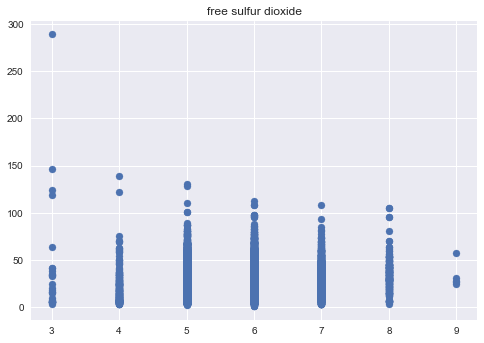

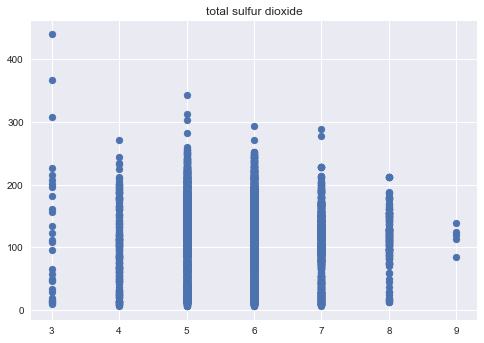

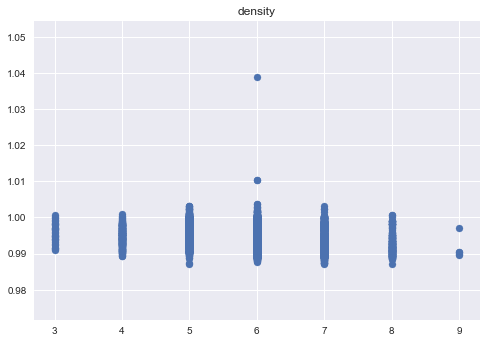

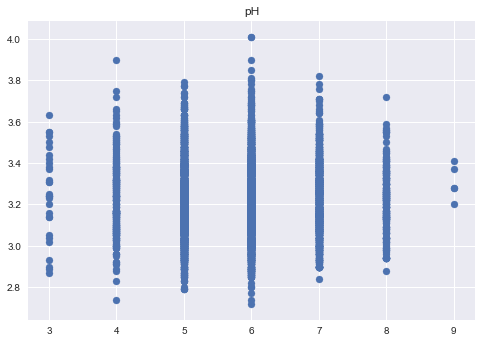

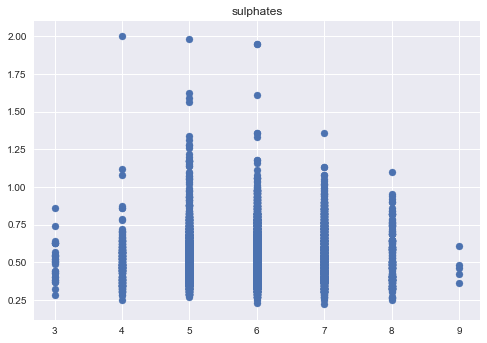

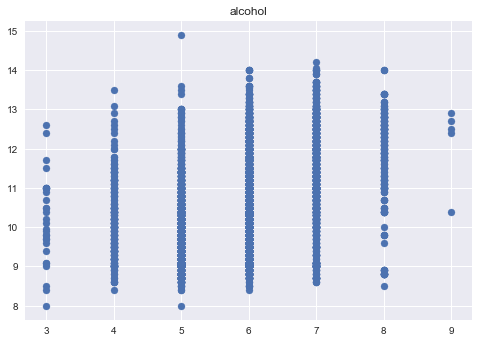

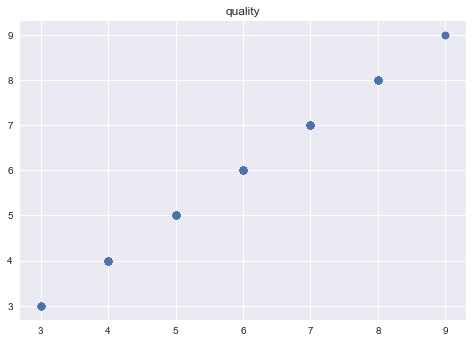

In [44]:
for i in wine:
    plt.scatter(wine['quality'], wine[i])
    plt.title(i)
    plt.show()

In [52]:
wine[wine['residual sugar'] == wine['residual sugar'].max()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4380,7.8,0.965,0.6,65.8,0.074,8.0,160.0,1.03898,3.39,0.69,11.7,6


In [53]:
test=wine.copy()
test.drop(4380, axis=0, inplace=True)

In [56]:
test.loc[4379]

fixed acidity             6.20000
volatile acidity          0.23500
citric acid               0.34000
residual sugar            1.90000
chlorides                 0.03600
free sulfur dioxide       4.00000
total sulfur dioxide    117.00000
density                   0.99032
pH                        3.40000
sulphates                 0.44000
alcohol                  12.20000
quality                   5.00000
Name: 4379, dtype: float64

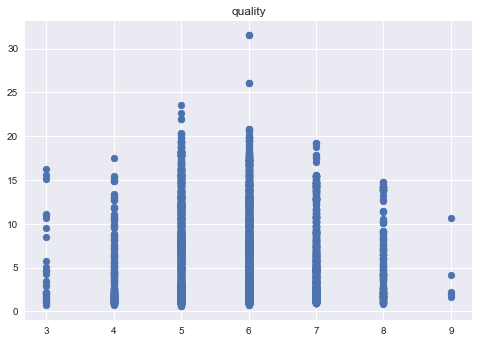

In [59]:
plt.scatter(test['quality'], test['residual sugar'])
plt.title(i)
plt.show()

In [60]:
model = PLSRegression()
score = cross_val_score(model, test.iloc[:,:-1], test.iloc[:,-1], cv=20, scoring='neg_mean_absolute_error')
print(score.mean())

-0.5835087505176475


In [96]:
score = cross_val_score(model, wine[wine['quality'] != 3].iloc[:,:-1], wine[wine['quality'] != 3].iloc[:,-1], cv=20, scoring='neg_mean_absolute_error')
print(score.mean())

-0.5741196142077896


In [87]:
pred = cross_val_predict(model, wine.iloc[:,:-1], wine.iloc[:,-1], cv=20)
for i in pred:
    if i < 5 :
        print('9')

9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9


In [97]:
wine[wine['quality'] == 9]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2373,9.1,0.27,0.45,10.6,0.035,28.0,124.0,0.99700,3.20,0.46,10.4,9
2419,6.6,0.36,0.29,1.6,0.021,24.0,85.0,0.98965,3.41,0.61,12.4,9
2426,7.4,0.24,0.36,2.0,0.031,27.0,139.0,0.99055,3.28,0.48,12.5,9
2475,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,9
3204,7.1,0.26,0.49,2.2,0.032,31.0,113.0,0.99030,3.37,0.42,12.9,9


In [102]:
test = wine.copy()
print(len(test))
test.drop(2373, inplace=True)
print(len(test))

6497
6496


In [258]:
quality3 = wine[wine['quality'] == 3]
quality4 = wine[wine['quality'] == 4]
quality5 = wine[wine['quality'] == 5]
quality6 = wine[wine['quality'] == 6]
quality7 = wine[wine['quality'] == 7]
quality8 = wine[wine['quality'] == 8]
quality9 = test[test['quality'] == 9]

In [264]:
resampled_wine = []

random_wine = np.random.choice(quality3.index, int(len(quality3.index)/2), replace = False)
resampled_wine.extend(random_wine)
random_wine = np.random.choice(quality4.index, int(len(quality4.index)/2), replace = False)
resampled_wine.extend(random_wine)
random_wine = np.random.choice(quality5.index, int(len(quality5.index)/2), replace = False)
resampled_wine.extend(random_wine)
random_wine = np.random.choice(quality6.index, int(len(quality6.index)/2), replace = False)
resampled_wine.extend(random_wine)
random_wine = np.random.choice(quality7.index, int(len(quality5.index)/2), replace = False)
resampled_wine.extend(random_wine)
random_wine = np.random.choice(quality8.index, int(len(quality4.index)/2), replace = False)
resampled_wine.extend(random_wine)
random_wine = np.random.choice(quality9.index, int(len(quality3.index)/2), replace = True)
resampled_wine.extend(random_wine)

data = test.loc[resampled_wine]

In [128]:
resampled_wine = []
random_wine = np.random.choice(quality9.index, len(quality3.index), replace = True)
resampled_wine.extend(random_wine)
random_wine = np.random.choice(quality7.index, len(quality5.index), replace = True)
resampled_wine.extend(random_wine)
list1 = [quality3.index, quality4.index, quality5.index, quality6.index, quality8.index]
for i in list1:
    resampled_wine.extend(i)

data = wine.loc[resampled_wine]
data['quality'].value_counts()

In [129]:
data['quality'].value_counts()

6    2836
7    2138
5    2138
4     216
8     193
3      30
9      30
Name: quality, dtype: int64

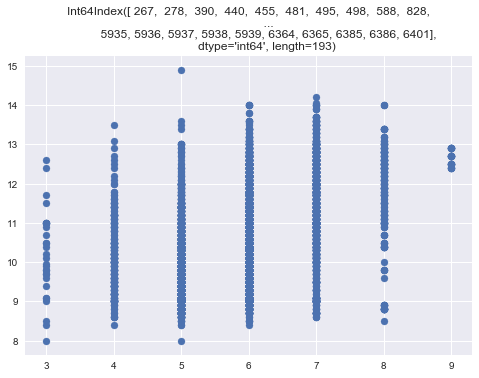

In [125]:
plt.scatter(data['quality'], data['alcohol'])
plt.title(i)
plt.show()

In [130]:
model = PLSRegression()
score = cross_val_score(model, data.iloc[:,:-1], data.iloc[:,-1], cv=20, scoring='neg_mean_absolute_error')
print(score.mean())

-0.6451158227686823


In [127]:
len(data)

6522

In [311]:
#test_data = wine.iloc[:,:-1].copy()
test1 = test.copy()
for i in test:
    test1[i] = StandardScaler().fit_transform(test1[i].values.reshape(-1,1))

test1['quality'] = wine['quality']

outliers =[]

for i in range(len(test)):
    for j in test1.iloc[i,:-1]:
        if j > 3 or j < -3:
            outliers.append(i)
outliers = pd.DataFrame(pd.Series(outliers).value_counts(), columns = ['count'])
outliers['count'].value_counts()

C:\Users\Vincent\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


1    98
2     9
3     1
Name: count, dtype: int64

In [312]:
#for i in np.array(outliers.index):
 #   if outliers.loc[i].values < 4:
  #      outliers.drop(i, inplace=True)

log_data = test1.copy()
log_data.drop(outliers.index, inplace = True)
score = cross_val_score(model, log_data.iloc[:,:-1], log_data.iloc[:,-1], cv=20, scoring='neg_mean_absolute_error')
print(score.mean())

-0.5769604681171666


In [149]:
log_data.drop(2373, inplace=True)

In [150]:
quality3 = log_data[log_data['quality'] == 3]
quality4 = log_data[log_data['quality'] == 4]
quality5 = log_data[log_data['quality'] == 5]
quality6 = log_data[log_data['quality'] == 6]
quality7 = log_data[log_data['quality'] == 7]
quality8 = log_data[log_data['quality'] == 8]
quality9 = log_data[log_data['quality'] == 9]

In [151]:
resampled_wine = []
random_wine = np.random.choice(quality9.index, len(quality3.index), replace = True)
resampled_wine.extend(random_wine)
random_wine = np.random.choice(quality7.index, len(quality5.index), replace = True)
resampled_wine.extend(random_wine)
list1 = [quality3.index, quality4.index, quality5.index, quality6.index, quality8.index]
for i in list1:
    resampled_wine.extend(i)

data = log_data.loc[resampled_wine]
data['quality'].value_counts()

6    2829
7    2137
5    2137
4     216
8     191
3      27
9      27
Name: quality, dtype: int64

In [169]:
score = cross_val_score(model, data.iloc[:,:-1], data.iloc[:,-1], cv=20, scoring='neg_mean_absolute_error')
print(score.mean())

-0.6511035373325695


In [170]:
pred = cross_val_predict(model, data.iloc[:,:-1], data.iloc[:,-1], cv=20)

In [183]:
pred[2164:2190]

array([[5.39494355],
       [4.9158555 ],
       [5.55676407],
       [5.8656183 ],
       [5.55086272],
       [5.37504881],
       [5.11447227],
       [5.27206174],
       [5.40659957],
       [5.45252183],
       [5.55774145],
       [6.52460557],
       [4.68967151],
       [6.33464906],
       [6.67963896],
       [5.77684045],
       [5.04249313],
       [6.36102056],
       [5.5754151 ],
       [5.32101547],
       [5.81627528],
       [5.92806726],
       [5.95128189],
       [5.89292592],
       [6.18555479],
       [6.09471496]])

In [182]:
#data.loc[3204]
data[data['quality']==3]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2164,2.482902,1.449071,2.188219,-0.597919,1.046165,-1.300511,-1.213807,1.940888,0.256158,0.468566,-1.467194,3
2165,2.038689,1.539606,1.170680,-0.657809,2.374967,-1.896867,-1.888910,1.529347,-0.312613,0.845717,-2.527575,3
2166,0.337344,2.370956,-2.411240,0.214193,1.605758,-1.896867,-1.939098,0.662157,2.292974,0.256845,0.342446,3
2167,2.038689,0.890979,0.724093,-1.096531,2.159608,0.349017,-1.193826,1.201975,1.012971,1.877015,-0.371293,3
2168,0.976516,2.239988,-2.239625,-0.052387,1.325061,-1.757908,-2.017938,1.384930,1.550048,-0.136162,0.570049,3
2169,0.493133,2.546946,-2.411240,-0.657809,2.102171,-1.896867,-2.073958,0.058561,1.653241,-0.998636,0.496178,3
2170,-0.190466,1.984273,-2.411240,-1.389621,2.453083,-0.773578,-1.588942,0.041770,0.672493,0.027486,-0.474412,3
2171,0.256000,2.199834,-1.987259,-0.657809,0.575123,-0.480698,-1.173917,0.805623,0.614316,0.329290,-0.581366,3
2172,0.085795,2.073401,-1.987259,0.548835,1.274182,-2.229592,-1.939098,1.128028,1.123321,0.106013,-0.082436,3
2173,-0.288801,1.888993,-2.239625,-0.857817,1.165305,-1.757908,-1.991088,0.468358,1.905480,0.845717,-0.321087,3


In [168]:
data.set_index(np.array(range(len(data))), inplace = True)

In [32]:
test.head()

,volatile acidity,citric acid,residual sugar,chlorides,sulfur ratio,pH,sulphates,alcohol,acid,quality
0,0.70,0.00,1.9,0.076,0.323529,3.51,0.56,9.4,2,5
1,0.88,0.00,2.6,0.098,0.373134,3.20,0.68,9.8,3,5
2,0.76,0.04,2.3,0.092,0.277778,3.26,0.65,9.8,3,5
3,0.28,0.56,1.9,0.075,0.283333,3.16,0.58,9.8,3,6
4,0.70,0.00,1.9,0.076,0.323529,3.51,0.56,9.4,2,5


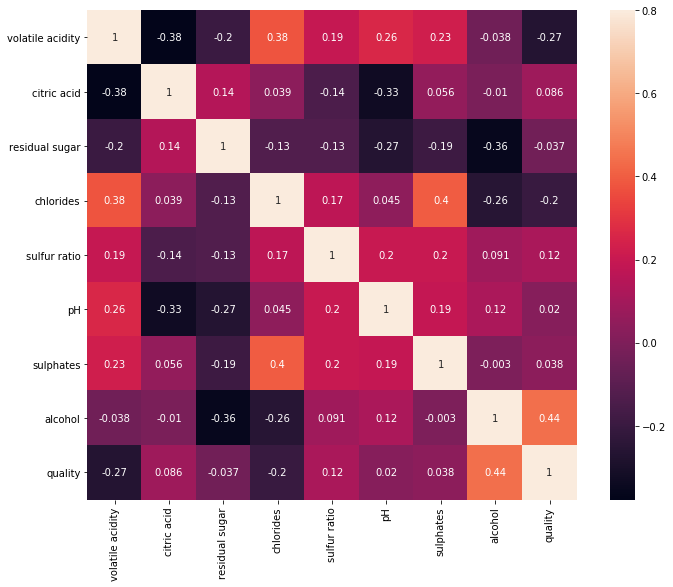

In [33]:
corrmat = test.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True,annot=True);

In [186]:
for i in test:
    if i == 'quality':
        pass
    else:
        stuff = test.drop(i, axis=1)
        model = PLSRegression(n_components=2)
        score = cross_val_score(model, stuff.iloc[:,:-1], stuff.iloc[:,-1], cv=20, scoring='neg_mean_absolute_error')
        print(i,score.mean())

fixed acidity -0.5775760337115823
volatile acidity -0.5937233496841815
citric acid -0.5773718340320466
residual sugar -0.5921253015401325
chlorides -0.5794080270187946
free sulfur dioxide -0.5826535316167205
total sulfur dioxide -0.5849300022617491
density -0.5829157648194085
pH -0.5820726172036839
sulphates -0.5863038949542043
alcohol -0.6167871156380413


In [216]:
#test.drop(['citric acid', 'chlorides'], axis=1, inplace=True)
model = PLSRegression()
score = cross_val_score(model, test.iloc[:,:-1], test.iloc[:,-1], cv=20, scoring='neg_mean_absolute_error')
print(score.mean())

-0.5736246388876101


In [395]:
test.insert(5, 'sulfur ratio', wine['free sulfur dioxide'] / wine['total sulfur dioxide'])
test.drop(['free sulfur dioxide', 'total sulfur dioxide'], axis=1, inplace=True)

In [202]:
test1 = np.log1p(test)
test1['quality'] = test['quality']

In [210]:
test = wine.copy()

In [385]:
test.drop(['citric acid', 'chlorides'], axis=1, inplace=True)
#test.insert(5, 'sulfur ratio', test['free sulfur dioxide'] / test['total sulfur dioxide'])
#test.drop(['free sulfur dioxide', 'total sulfur dioxide'], axis=1, inplace=True)

In [217]:
test.head()

,fixed acidity,volatile acidity,residual sugar,sulfur ratio,density,pH,sulphates,alcohol,quality
0,1.189512,0.227025,0.739740,0.203762,0.009381,0.557029,0.207029,0.867158,5
1,1.238344,0.242091,0.940452,0.224891,0.008606,0.380512,0.243922,1.018138,5
2,1.238344,0.232891,0.862713,0.181988,0.008762,0.417824,0.235709,1.018138,5
3,1.512852,0.133183,0.739740,0.184761,0.009534,0.354655,0.213985,1.018138,6
4,1.189512,0.227025,0.739740,0.203762,0.009381,0.557029,0.207029,0.867158,5


In [248]:
i=0
for x in pred:
    if x >= 6 and x <7:
        i+=1

In [249]:
i

2402

In [250]:
i/len(test)

0.36970909650607975

In [251]:
len(wine[wine['quality'] == 6]) / len(wine)

0.43650915807295676

In [227]:
pred = cross_val_predict(model, test.iloc[:,:-1], test.iloc[:,-1], cv=20)


(array([   5.,   34.,  326.,  770., 1280., 1339., 1371.,  983.,  345.,
          44.]),
 array([4.1723407 , 4.46610746, 4.75987422, 5.05364099, 5.34740775,
        5.64117451, 5.93494128, 6.22870804, 6.52247481, 6.81624157,
        7.11000833]),
 <a list of 10 Patch objects>)

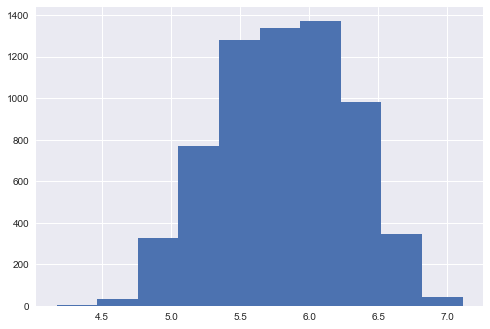

In [252]:
plt.hist(pred)

In [253]:
wine['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [254]:
35/len(wine)

0.005387101739264276

In [255]:
409/len(wine)

0.06295213175311683

In [256]:
2836/len(wine)

0.43650915807295676

In [257]:
3217/len(wine)

0.49515160843466216

In [289]:
resampled_wine = []

random_wine = np.random.choice(quality3.index, 346, replace = True)
resampled_wine.extend(random_wine)
random_wine = np.random.choice(quality4.index, 639, replace = True)
resampled_wine.extend(random_wine)
random_wine = np.random.choice(quality5.index, 1472, replace = False)
resampled_wine.extend(random_wine)
random_wine = np.random.choice(quality6.index, 1472, replace = False)
resampled_wine.extend(random_wine)
random_wine = np.random.choice(quality7.index, 1472, replace = True)
resampled_wine.extend(random_wine)
random_wine = np.random.choice(quality8.index, 639, replace = True)
resampled_wine.extend(random_wine)
random_wine = np.random.choice(quality9.index, 346, replace = True)
resampled_wine.extend(random_wine)

data = test.loc[resampled_wine]

In [290]:
data['quality'].value_counts()

7    1472
6    1472
5    1472
8     639
4     639
3     346
9     346
Name: quality, dtype: int64

In [386]:
model = PLSRegression()
score = cross_val_score(model, test.iloc[:,:-1], test.iloc[:,-1], cv=20, scoring='neg_mean_absolute_error')
print(score.mean())

-0.5744679751488145


In [101]:
test = wine.copy()
from scipy import stats
test.insert(5, 'sulfur ratio', wine['free sulfur dioxide'] / wine['total sulfur dioxide'])
test.drop(['free sulfur dioxide', 'total sulfur dioxide'], axis=1, inplace=True)
#test.insert(5, 'sugar*density', wine['residual sugar'] * wine['density'])
#test.drop(['residual sugar', 'density'], axis=1, inplace=True)
for i in test:
    x,_ = stats.boxcox(test[i] - test[i].min() + 1)
    test[i] = x
model = PLSRegression()
test['quality'] = wine['quality']

skew5 = test.skew()
score = cross_val_score(model, test.iloc[:,:-1], test.iloc[:,-1], cv=20, scoring='neg_mean_absolute_error')
print(score.mean())

-0.5738376216684636


In [369]:
test = np.log1p(wine.iloc[:,:-1])
test['quality'] = wine['quality']
score = cross_val_score(model, test.iloc[:,:-1], test.iloc[:,-1], cv=20, scoring='neg_mean_absolute_error')
print(score.mean())

-0.5829893386462903


In [422]:
test.to_csv('winedata', encoding='utf-8', index=False)

In [421]:
test.drop(['density'], axis=1, inplace=True)

In [102]:
test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,sulfur ratio,density,pH,sulphates,alcohol,quality
0,1.189512,0.227025,0.000000,0.739740,0.033633,0.203762,0.009381,0.557029,0.207029,0.867158,5
1,1.238344,0.242091,0.000000,0.940452,0.037278,0.224891,0.008606,0.380512,0.243922,1.018138,5
2,1.238344,0.232891,0.039366,0.862713,0.036454,0.181988,0.008762,0.417824,0.235709,1.018138,5
3,1.512852,0.133183,0.463782,0.739740,0.033421,0.184761,0.009534,0.354655,0.213985,1.018138,6
4,1.189512,0.227025,0.000000,0.739740,0.033633,0.203762,0.009381,0.557029,0.207029,0.867158,5


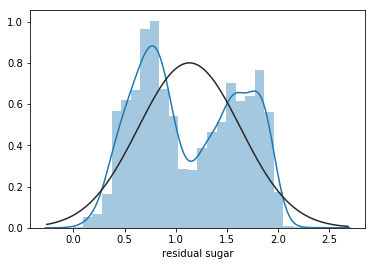

In [89]:
x = test['residual sugar']
sns.distplot(x,fit=norm)

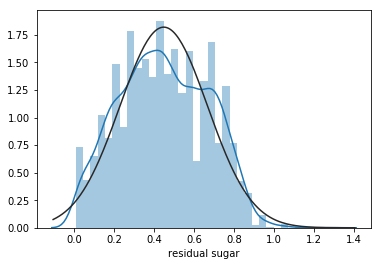

In [90]:
x = abs(x-x.mean())
sns.distplot(x,fit=norm)

C:\Users\Vincent\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


OverflowError: cannot convert float infinity to integer

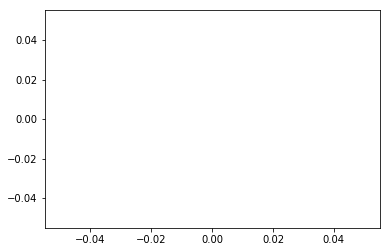

In [88]:
x = np.log(x)
sns.distplot(x,fit=norm)

In [423]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.400000,5
1,7.8,0.880,0.00,2.60,0.098,25.0,67.0,0.99680,3.20,0.68,9.800000,5
2,7.8,0.760,0.04,2.30,0.092,15.0,54.0,0.99700,3.26,0.65,9.800000,5
3,11.2,0.280,0.56,1.90,0.075,17.0,60.0,0.99800,3.16,0.58,9.800000,6
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.400000,5
5,7.4,0.660,0.00,1.80,0.075,13.0,40.0,0.99780,3.51,0.56,9.400000,5
6,7.9,0.600,0.06,1.60,0.069,15.0,59.0,0.99640,3.30,0.46,9.400000,5
7,7.3,0.650,0.00,1.20,0.065,15.0,21.0,0.99460,3.39,0.47,10.000000,7
8,7.8,0.580,0.02,2.00,0.073,9.0,18.0,0.99680,3.36,0.57,9.500000,7
9,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.500000,5


In [425]:
wine['fixed acidity'].describe()

count    6497.000000
mean        7.215307
std         1.296434
min         3.800000
25%         6.400000
50%         7.000000
75%         7.700000
max        15.900000
Name: fixed acidity, dtype: float64

In [ ]:
for i in range(len(wine)):
    if wine['fixed acidity'].loc[i] < 6.4:
        wine['acid'].loc[i] = 'L'
    elif wine['fixed acidity'].loc[i] > 7.7:
        wine['acid'].loc[i] = 'H'
    else:
        wine['acid'].loc[i] = 'M'

C:\Users\Vincent\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [12]:
wine.insert(11, 'acid', '')

In [ ]:
wine['acid'].value_counts()

In [7]:
stuff = []

In [10]:
stuff.append('bye')

In [11]:
stuff

['hi', 'bye']

In [26]:
test = wine.copy()
acid = []
for i in wine['fixed acidity']:
    if i < 6.4:
        acid.append('1')
    elif i > 7.7:
        acid.append('3')
    else:
        acid.append('2')

In [27]:
test.insert(11, 'acid', pd.Series(acid))

In [56]:
test.insert(5, 'sulfur ratio', wine['free sulfur dioxide'] / wine['total sulfur dioxide'])
test.drop(['free sulfur dioxide', 'total sulfur dioxide'], axis=1, inplace=True)

In [57]:
test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,sulfur ratio,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,0.323529,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,0.373134,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,0.277778,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,0.283333,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,0.323529,0.9978,3.51,0.56,9.4,5


In [91]:
model = PLSRegression(n_components=9)
score = cross_val_score(model, test.iloc[:,:-1], test.iloc[:,-1], cv=20, scoring='neg_mean_absolute_error')
print(score.mean())

-0.5701816376449969


In [40]:
wine['pH'].describe()

count    6497.000000
mean        3.218501
std         0.160787
min         2.720000
25%         3.110000
50%         3.210000
75%         3.320000
max         4.010000
Name: pH, dtype: float64

In [50]:
ph = []
for i in wine['pH']:
    if i < 3.11:
        ph.append('1')
    elif i > 3.32:
        ph.append('3')
    else:
        ph.append('2')
test['ph'] = pd.Series(ph)        
#test.insert(7, 'ph', pd.Series(ph))

In [60]:
test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,sulfur ratio,density,pH,sulphates,alcohol,q
0,7.4,0.70,0.00,1.9,0.076,0.323529,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,0.373134,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,0.277778,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,0.283333,0.9980,3.16,0.58,9.8,2
4,7.4,0.70,0.00,1.9,0.076,0.323529,0.9978,3.51,0.56,9.4,2


In [44]:
test.drop(['pH','citric acid'], axis=1, inplace=True)

In [55]:
test=wine.copy()

In [59]:
q=[]
for i in wine['quality']:
    if i < 5:
        q.append(1)
    elif i > 7:
        q.append(3)
    else:
        q.append(2)
test.insert(10, 'q', pd.Series(q))
test.drop('quality', axis=1,inplace=True)

In [62]:
pred = cross_val_predict(model,test.iloc[:,:-1], test.iloc[:,-1], cv=20)

(array([   0., 6497.,    0.]),
 array([1.5       , 1.83333333, 2.16666667, 2.5       ]),
 <a list of 3 Patch objects>)

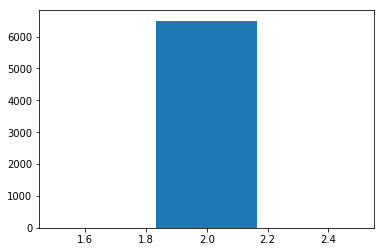

In [74]:
plt.hist(pred,bins=3)

In [73]:
for i in range(len(pred)):
    if pred[i] < 1.5:
        pred[i] = 1
    elif pred[i] > 2.5:
        pred[i] = 3
    else:
        pred[i] = 2

In [79]:
pred.values

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [80]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [93]:
wine['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [94]:
35/len(wine)

0.005387101739264276

In [95]:
409/len(wine)

0.06295213175311683

In [96]:
wines = pd.read_csv('winedata.csv')
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,sulfur ratio,pH,sulphates,alcohol,quality
0,1.189512,0.227025,0.000000,0.739740,0.033633,0.203762,0.557029,0.207029,0.867158,5
1,1.238344,0.242091,0.000000,0.940452,0.037278,0.224891,0.380512,0.243922,1.018138,5
2,1.238344,0.232891,0.039366,0.862713,0.036454,0.181988,0.417824,0.235709,1.018138,5
3,1.512852,0.133183,0.463782,0.739740,0.033421,0.184761,0.354655,0.213985,1.018138,6
4,1.189512,0.227025,0.000000,0.739740,0.033633,0.203762,0.557029,0.207029,0.867158,5


(array([5.555e+03, 8.240e+02, 1.130e+02, 2.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([6.76466061e-03, 6.04176466e+00, 1.20767647e+01, 1.81117647e+01,
        2.41467647e+01, 3.01817647e+01, 3.62167647e+01, 4.22517647e+01,
        4.82867647e+01, 5.43217647e+01, 6.03567647e+01]),
 <a list of 10 Patch objects>)

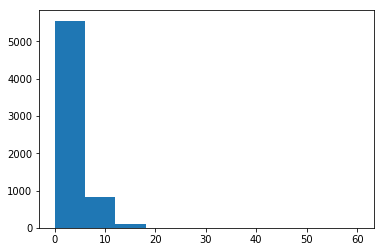

In [107]:
plt.hist(wines['residual sugar'])

In [105]:
wines['residual sugar'] = abs(wine['residual sugar']-wine['residual sugar'].mean())

In [100]:
len(wines)

6497

In [103]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
